In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',35)

In [4]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}

In [5]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [6]:
df_list=[]
while True:
    params={
        '$limit':limit,
        '$offset':offset
    }
    response=requests.get(url,params=params)
    data=response.json()
    df_page=pd.DataFrame(data)
    if df_page.empty:
        break
    df_list.append(df_page)
    offset+=limit
df=pd.concat(df_list,ignore_index=True)

KeyboardInterrupt: 

In [7]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
0,16-1660403,2016-06-14T01:20:00.000,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.889, 42....",42.938,-78.889,14207,Grant-Amherst,NORTH,NORTH,55,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003,18,10,4,2,7,7,NaN
1,16-3480266,2016-12-13T05:00:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.889,-78.809,14206,Lovejoy,LOVEJOY,LOVEJOY,23,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001,8,5,86,1,25,2,2016-12-14T05:07:00.000
2,20-2010167,2020-07-19T03:09:00.000,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,NY,NaN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-3210732,2014-11-17T08:08:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,2014-11-18T07:05:00.000
4,15-1100268,2015-04-20T10:22:00.000,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.879, 42....",42.954,-78.879,14207,West Hertel,NORTH,NORTH,56,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007,18,10,79,2,19,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315863,24-2600569,2024-09-16T12:39:48.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,12,Monday,700 Block ST LAWRENCE AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.956,-78.842,14216,Central Park,DELAWARE,DELAWARE,45,1,1003,45,1,1003,District D,004500,36029004500,360290045001,360290045001003,13,1,85,2,11,8,2024-09-16T12:39:48.000
315864,24-2551037,2024-09-11T19:43:44.000,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,19,Wednesday,PORTER AV & BUSTI AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.894, 42.9]}",42.9,-78.894,14213,West Side,NIAGARA,NIAGARA,70,2,2000,70,2,2000,District B,007000,36029007000,360290070002,360290070002000,9,4,45,5,3,5,2024-09-11T19:44:44.000
315865,24-2900880,2024-10-16T18:30:00.000,ROBBERY,Buffalo Police are investigating this report o...,Robbery,18,Wednesday,1900 Block SENECA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.813, 42....",42.858,-78.813,14210,Seneca-Cazenovia,SOUTH,SOUTH,10,4,4001,10,4,4001,District A,001000,36029001000,360290010004,360290010004001,3,9,83,3,18,4,2024-10-16T18:32:03.000
315866,24-2550623,2024-09-11T13:58:19.000,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,13,Wednesday,CLINTON ST & BAILEY AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.82, 42.8...",42.872,-78.82,14206,Seneca Babcock,FILLMORE,FILLMORE,163,2,2005,163,2,2005,District A,016300,36029016300,360290163002,360290163002005,8,5,69,3,12,2,2024-09-11T13:58:19.000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315868 entries, 0 to 315867
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  315868 non-null  object
 1   incident_datetime            315868 non-null  object
 2   incident_type_primary        315868 non-null  object
 3   incident_description         315868 non-null  object
 4   parent_incident_type         315868 non-null  object
 5   hour_of_day                  315868 non-null  object
 6   day_of_week                  315868 non-null  object
 7   address_1                    315834 non-null  object
 8   city                         315868 non-null  object
 9   state                        315868 non-null  object
 10  location                     309589 non-null  object
 11  latitude                     314784 non-null  object
 12  longitude                    314784 non-null  object
 13  zip_code      

In [9]:
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [10]:
df['incident_description'].value_counts()

incident_description
Buffalo Police are investigating this report of a crime.  It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.    306941
Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.       5175
LARCENY/THEFT                                                                                                                                                                                                                 1811
BURGLARY                                                                                                                                                                                                                       960
ASSAULT                                                                

In [11]:
df['incident_description'] = df['incident_description'].str.replace(r'\s+', ' ', regex=True)

In [12]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [13]:
df['incident_description']=df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime. It is important to note that this is very preliminary information and further investigation as to the facts and circumstances of this report may be necessary.','under investigation')

In [14]:
df['incident_description'].value_counts()

incident_description
under investigation         312116
LARCENY/THEFT                 1811
BURGLARY                       960
ASSAULT                        603
SEXUAL ABUSE                   122
UUV                            103
RAPE                            78
ROBBERY                         34
CRIM NEGLIGENT HOMICIDE         20
THEFT OF SERVICES               13
AGG ASSAULT ON P/OFFICER         4
MURDER                           2
AGGR ASSAULT                     2
Name: count, dtype: int64

In [16]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          34
city                                0
state                               0
location                         6279
latitude                         1084
longitude                        1084
zip_code                         2423
neighborhood                     3375
council_district                 2474
council_district_2011            2423
census_tract                     3375
census_block_group               3375
census_block                     3375
census_tract_2010                3375
census_block_group_2010          3375
census_block_2010                3375
police_district                  3375
tractce20                        3236
geoid20_tract                    3236
geoid20_bloc

In [17]:
df=df.replace('UNKNOWN',np.nan)

In [18]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          51
city                                0
state                               0
location                         6279
latitude                         6279
longitude                        6279
zip_code                         3687
neighborhood                     6401
council_district                 2474
council_district_2011            3781
census_tract                     6281
census_block_group               6281
census_block                     6281
census_tract_2010               19637
census_block_group_2010         19688
census_block_2010               19638
police_district                  6287
tractce20                        6281
geoid20_tract                    6281
geoid20_bloc

In [19]:
df=df.sort_values(by='incident_datetime')

In [20]:
# df.to_csv('crime_dataset_buffalo.csv')

In [21]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')
df['hour_of_day']=df['hour_of_day'].dt.hour

In [22]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          51
city                                0
state                               0
location                         6279
latitude                         6279
longitude                        6279
zip_code                         3687
neighborhood                     6401
council_district                 2474
council_district_2011            3781
census_tract                     6281
census_block_group               6281
census_block                     6281
census_tract_2010               19637
census_block_group_2010         19688
census_block_2010               19638
police_district                  6287
tractce20                        6281
geoid20_tract                    6281
geoid20_bloc

In [23]:
df=df[df['incident_datetime']>='2009']


In [24]:
df

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,created_at
109038,09-1740322,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,1600 Block MAIN ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.863, 42....",42.917,-78.863,14209,Masten Park,ELLICOTT,ELLICOTT,168.02,1,1017,168,3,3015,District E,016802,36029016802,360290001101,360290165001017,14,4,10,2,14,3,NaN
110550,09-1210237,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,100 Block KRAKOW ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.875,-78.809,14206,Kaisertown,LOVEJOY,LOVEJOY,167,3,3019,167,3,3021,District A,016700,36029016700,360290001103,360290001103019,8,5,39,3,12,2,NaN
28850,09-3010604,2009-01-01 00:00:00,RAPE,under investigation,Sexual Assault,0,Thursday,500 Block W UTICA ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.888, 42....",42.911,-78.888,14213,West Side,NIAGARA,NIAGARA,69.01,1,1004,69.01,1,1004,District B,006901,36029006901,360290001101,360290055001004,10,6,67,5,3,5,NaN
71497,09-0830328,2009-01-01 00:00:00,SEXUAL ABUSE,under investigation,Other Sexual Offense,0,Thursday,1000 Block W DELAVAN AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.861, 42....",42.922,-78.861,14209,Elmwood Bidwell,ELLICOTT,ELLICOTT,169,4,4002,169,4,4000,District D,016900,36029016900,360290002004,360290002004002,14,4,10,2,14,3,NaN
88235,09-1060143,2009-01-01 00:00:00,LARCENY/THEFT,under investigation,Theft,0,Thursday,400 Block PRATT ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.86, 42.8...",42.892,-78.86,14204,Pratt-Willert,ELLICOTT,ELLICOTT,25.02,3,3017,25.02,2,2023,District B,002502,36029002502,360290001103,360290163003017,15,4,78,5,8,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315759,24-3090156,2024-11-04 07:03:51,ASSAULT,under investigation,Assault,7,Monday,400 Block NORTHLAND AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.919,-78.842,14211,Delavan Grider,MASTEN,MASTEN,34,3,3002,34,3,3002,District E,003400,36029003400,360290034003,360290034003002,17,8,76,4,20,1,2024-11-04T07:03:51.000
313387,24-3090236,2024-11-04 08:33:26,LARCENY/THEFT,under investigation,Theft,8,Monday,400 Block WILLIAM ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.855, 42....",42.885,-78.855,14204,Pratt-Willert,ELLICOTT,ELLICOTT,14.04,1,1001,14.02,2,2001,District B,001404,36029001404,360290014041,360290014041001,15,4,84,5,8,3,2024-11-04T08:34:26.000
315752,24-3090255,2024-11-04 08:58:45,LARCENY/THEFT,under investigation,Theft,8,Monday,400 Block S PARK AV,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.864, 42....",42.872,-78.864,14204,Ellicott,ELLICOTT,FILLMORE,164,1,1010,164,1,1017,District A,016400,36029016400,360290164001,360290164001010,15,2,31,3,32,3,2024-11-04T08:59:45.000
315414,24-3090287,2024-11-04 09:27:27,LARCENY/THEFT,under investigation,Theft,9,Monday,400 Block GRANT ST,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.89, 42.9...",42.927,-78.89,14213,Upper West Side,NIAGARA,NORTH,171,2,2002,171,2,2002,District D,017100,36029017100,360290171002,360290171002002,10,10,73,2,31,5,2024-11-04T09:28:27.000


In [25]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          34
city                                0
state                               0
location                         6027
latitude                         6027
longitude                        6027
zip_code                         3333
neighborhood                     6023
council_district                 2351
council_district_2011            3415
census_tract                     5938
census_block_group               5938
census_block                     5938
census_tract_2010               19278
census_block_group_2010         19316
census_block_2010               19279
police_district                  5952
tractce20                        5938
geoid20_tract                    5938
geoid20_bloc

In [26]:
df=df.reset_index(drop=True)

In [27]:
df['incident_type_primary']=df['incident_type_primary'].str.lower()

In [28]:
df['incident_type_primary'].value_counts()

incident_type_primary
larceny/theft               113930
assault                      52731
burglary                     45211
uuv                          25120
robbery                      15699
rape                          2361
sexual abuse                  2234
theft of services             1795
murder                         830
breaking & entering             81
aggr assault                    75
crim negligent homicide         61
theft                           34
manslaughter                    19
agg assault on p/officer        13
sexual assault                   6
theft of vehicle                 4
other sexual offense             2
sodomy                           1
Name: count, dtype: int64

In [29]:
df.columns

Index(['case_number', 'incident_datetime', 'incident_type_primary',
       'incident_description', 'parent_incident_type', 'hour_of_day',
       'day_of_week', 'address_1', 'city', 'state', 'location', 'latitude',
       'longitude', 'zip_code', 'neighborhood', 'council_district',
       'council_district_2011', 'census_tract', 'census_block_group',
       'census_block', 'census_tract_2010', 'census_block_group_2010',
       'census_block_2010', 'police_district', 'tractce20', 'geoid20_tract',
       'geoid20_blockgroup', 'geoid20_block', ':@computed_region_jdfw_hhbp',
       ':@computed_region_h7a8_iwt4', ':@computed_region_ff6v_jbaa',
       ':@computed_region_vsen_jbmg', ':@computed_region_nmyf_6jtp',
       ':@computed_region_yg52_574g', 'created_at'],
      dtype='object')

In [30]:
df['latitude']=df['latitude'].astype('float64')
df['longitude']=df['longitude'].astype('float64')

In [31]:
df.isnull().sum()

case_number                         0
incident_datetime                   0
incident_type_primary               0
incident_description                0
parent_incident_type                0
hour_of_day                         0
day_of_week                         0
address_1                          34
city                                0
state                               0
location                         6027
latitude                         6027
longitude                        6027
zip_code                         3333
neighborhood                     6023
council_district                 2351
council_district_2011            3415
census_tract                     5938
census_block_group               5938
census_block                     5938
census_tract_2010               19278
census_block_group_2010         19316
census_block_2010               19279
police_district                  5952
tractce20                        5938
geoid20_tract                    5938
geoid20_bloc

In [32]:
df_filtered=df.drop(columns=['created_at'])

In [33]:
df_filtered.dropna(axis='index',inplace=True)

In [34]:
# df_filtered.to_csv('filtered_data.csv')

In [35]:
df_filtered['address_1']=df_filtered['address_1'].str.lower()

In [36]:
df['incident_type_primary'].unique()


array(['larceny/theft', 'rape', 'sexual abuse', 'burglary', 'uuv',
       'theft of services', 'assault', 'robbery', 'murder',
       'manslaughter', 'theft', 'theft of vehicle', 'breaking & entering',
       'sexual assault', 'other sexual offense', 'aggr assault',
       'agg assault on p/officer', 'crim negligent homicide', 'sodomy'],
      dtype=object)

In [37]:
df_filtered.isnull().sum()


case_number                    0
incident_datetime              0
incident_type_primary          0
incident_description           0
parent_incident_type           0
hour_of_day                    0
day_of_week                    0
address_1                      0
city                           0
state                          0
location                       0
latitude                       0
longitude                      0
zip_code                       0
neighborhood                   0
council_district               0
council_district_2011          0
census_tract                   0
census_block_group             0
census_block                   0
census_tract_2010              0
census_block_group_2010        0
census_block_2010              0
police_district                0
tractce20                      0
geoid20_tract                  0
geoid20_blockgroup             0
geoid20_block                  0
:@computed_region_jdfw_hhbp    0
:@computed_region_h7a8_iwt4    0
:@computed

In [38]:
# Convert dicts to strings
df_filtered['location'] = df_filtered['location'].apply(lambda x: str(x) if isinstance(x, dict) else x)


In [39]:
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:         case_number   incident_datetime incident_type_primary  \
5       09-0830328 2009-01-01 00:00:00          sexual abuse   
8       09-1320602 2009-01-01 00:00:00                  rape   
22      09-0640645 2009-01-01 00:00:00         larceny/theft   
25      09-1740322 2009-01-01 00:00:00         larceny/theft   
29      17-2770266 2009-01-01 00:01:00          sexual abuse   
...            ...                 ...                   ...   
260176  24-3080099 2024-11-03 01:00:00         larceny/theft   
260181  24-3080156 2024-11-03 02:52:58              burglary   
260183  24-3080255 2024-11-03 06:52:49                   uuv   
260185  24-3080296 2024-11-03 08:03:06                   uuv   
260188  24-3080408 2024-11-03 10:15:00         larceny/theft   

       incident_description  parent_incident_type  hour_of_day day_of_week  \
5       under investigation  Other Sexual Offense            0    Thursday   
8       under investigation        Sexual Assaul

In [40]:
# Find duplicate rows after fixing the dict issue
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows_df))


Number of duplicate rows:  60694


In [41]:
# Show all the duplicate rows
duplicate_rows_df = df_filtered[df_filtered.duplicated()]
print(duplicate_rows_df)


       case_number   incident_datetime incident_type_primary  \
5       09-0830328 2009-01-01 00:00:00          sexual abuse   
8       09-1320602 2009-01-01 00:00:00                  rape   
22      09-0640645 2009-01-01 00:00:00         larceny/theft   
25      09-1740322 2009-01-01 00:00:00         larceny/theft   
29      17-2770266 2009-01-01 00:01:00          sexual abuse   
...            ...                 ...                   ...   
260176  24-3080099 2024-11-03 01:00:00         larceny/theft   
260181  24-3080156 2024-11-03 02:52:58              burglary   
260183  24-3080255 2024-11-03 06:52:49                   uuv   
260185  24-3080296 2024-11-03 08:03:06                   uuv   
260188  24-3080408 2024-11-03 10:15:00         larceny/theft   

       incident_description  parent_incident_type  hour_of_day day_of_week  \
5       under investigation  Other Sexual Offense            0    Thursday   
8       under investigation        Sexual Assault            0    Thursday 

In [42]:
df_non_duplicates = df_filtered.drop_duplicates(keep=False)

In [43]:
df_non_duplicates.incident_type_primary.unique()

array(['larceny/theft', 'rape', 'sexual abuse', 'burglary', 'uuv',
       'theft of services', 'assault', 'robbery', 'murder',
       'manslaughter', 'theft', 'theft of vehicle', 'breaking & entering',
       'sexual assault', 'aggr assault', 'agg assault on p/officer',
       'crim negligent homicide'], dtype=object)

In [44]:

# Crime categories grouping
sexual_crimes = ['other sexual offense', 'sexual assault', 'rape', 'sexual abuse', 'sodomy']
assault_crimes = ['agg assault on p/officer', 'aggr assault', 'assault']
vehicle_crimes = ['theft of vehicles', 'uuv', 'theft of vehicle']
theft_crimes = ['burglary', 'larceny/theft', 'robbery', 'theft of services', 'theft', 'breaking & entering']
murder_crimes = ['crim negligent homicide', 'homicide', 'manslaughter', 'murder']

# Replace crime types with broader categories
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(sexual_crimes, 'Sexual Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(assault_crimes, 'Assault Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(vehicle_crimes, 'Vehicle Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(theft_crimes, 'Theft Crime')
df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(murder_crimes, 'Murder Crime')
    

/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/4266199688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(sexual_crimes, 'Sexual Crime')
/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/4266199688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['incident_type_primary'] = df_non_duplicates['incident_type_primary'].replace(assault_crimes, 'Assault Crime')

In [45]:
df_graph1 = df_non_duplicates.groupby('incident_type_primary')['case_number'].nunique().sort_values(ascending=False)


In [ ]:
df_non_duplicates['Year'] = pd.to_datetime(df_non_duplicates['incident_datetime']).dt.year
df_non_duplicates['month'] = pd.to_datetime(df_non_duplicates['incident_datetime']).dt.month

/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/1075928847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['Year'] = pd.to_datetime(df_non_duplicates['incident_datetime']).dt.year


In [53]:
df_non_duplicates

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,...,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,Year,month
1,09-1210237,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,100 block krakow st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.875,-78.809,14206,Kaisertown,LOVEJOY,LOVEJOY,...,3019,167,3,3021,District A,016700,36029016700,360290001103,360290001103019,8,5,39,3,12,2,2009,1
2,09-3010604,2009-01-01 00:00:00,Sexual Crime,under investigation,Sexual Assault,0,Thursday,500 block w utica st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.888, 42....",42.911,-78.888,14213,West Side,NIAGARA,NIAGARA,...,1004,69.01,1,1004,District B,006901,36029006901,360290001101,360290055001004,10,6,67,5,3,5,2009,1
4,09-1060143,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,400 block pratt st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.86, 42.8...",42.892,-78.860,14204,Pratt-Willert,ELLICOTT,ELLICOTT,...,3017,25.02,2,2023,District B,002502,36029002502,360290001103,360290163003017,15,4,78,5,8,3,2009,1
6,09-0770421,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,minnesota av & bailey av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.814, 42....",42.946,-78.814,14215,University Heights,UNIVERSITY,UNIVERSITY,...,1000,47,2,2000,District E,004701,36029004701,360290001101,360290035021000,11,7,46,4,34,9,2009,1
11,09-0010819,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,1 block heward av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.905, 42....",42.949,-78.905,14207,Riverside,NORTH,NORTH,...,2011,58.02,2,2010,District D,005802,36029005802,360290001102,360290170002011,18,10,64,2,15,7,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260202,24-3090156,2024-11-04 07:03:51,Assault Crime,under investigation,Assault,7,Monday,400 block northland av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.919,-78.842,14211,Delavan Grider,MASTEN,MASTEN,...,3002,34,3,3002,District E,003400,36029003400,360290034003,360290034003002,17,8,76,4,20,1,2024,11
260203,24-3090236,2024-11-04 08:33:26,Theft Crime,under investigation,Theft,8,Monday,400 block william st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.855, 42....",42.885,-78.855,14204,Pratt-Willert,ELLICOTT,ELLICOTT,...,1001,14.02,2,2001,District B,001404,36029001404,360290014041,360290014041001,15,4,84,5,8,3,2024,11
260204,24-3090255,2024-11-04 08:58:45,Theft Crime,under investigation,Theft,8,Monday,400 block s park av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.864, 42....",42.872,-78.864,14204,Ellicott,ELLICOTT,FILLMORE,...,1010,164,1,1017,District A,016400,36029016400,360290164001,360290164001010,15,2,31,3,32,3,2024,11
260205,24-3090287,2024-11-04 09:27:27,Theft Crime,under investigation,Theft,9,Monday,400 block grant st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.89, 42.9...",42.927,-78.890,14213,Upper West Side,NIAGARA,NORTH,...,2002,171,2,2002,District D,017100,36029017100,360290171002,360290171002002,10,10,73,2,31,5,2024,11


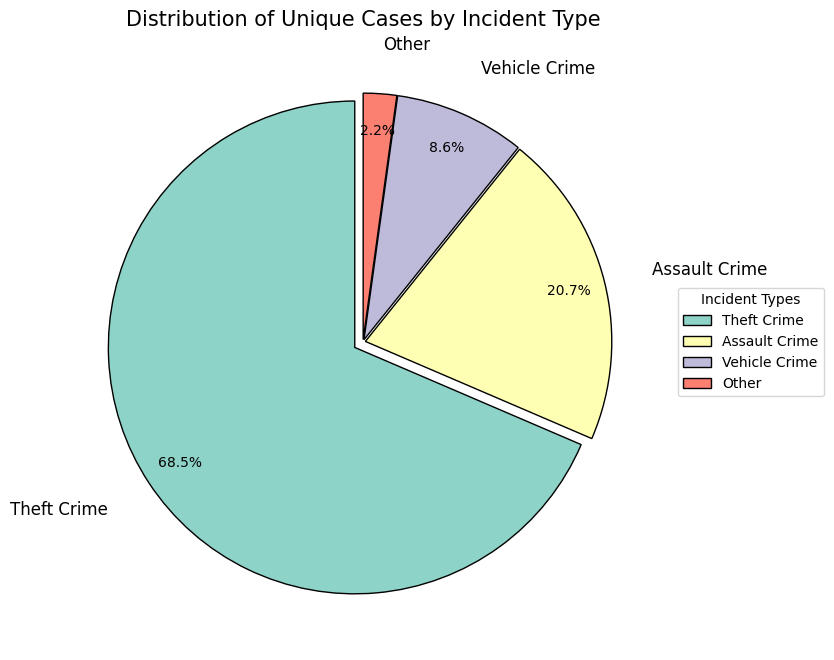

In [54]:
import matplotlib.pyplot as plt
import pandas as pd



# Group by incident type and count unique case numbers
df_graph1 = df_non_duplicates.groupby('incident_type_primary')['case_number'].nunique().sort_values(ascending=False)

# Set a threshold to group smaller slices together into 'Other'
threshold = 0.03 * df_graph1.sum()  # 3% threshold

# Grouping the smaller categories as "Other"
df_graph1_grouped = df_graph1[df_graph1 >= threshold]
df_graph1_grouped['Other'] = df_graph1[df_graph1 < threshold].sum()

# Increase the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the pie chart with a reduced explode value
wedges, texts, autotexts = plt.pie(
    df_graph1_grouped,                      # Data for the pie chart
    labels=df_graph1_grouped.index,         # Labels for the slices
    autopct='%1.1f%%',                      # Show percentages on slices
    startangle=90,                          # Start the chart at 90 degrees
    explode=[0.04] + [0.01] * (len(df_graph1_grouped) - 1),  # Reduced explode values
    pctdistance=0.85,                       # Distance of percentage labels from the center
    labeldistance=1.2,                      # Move labels outside the chart for better clarity
    textprops={'fontsize': 12},             # Set font size for better readability
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Add borders to the wedges
    colors=plt.cm.Set3.colors               # Use the 'Set3' colormap for better color contrast
)

# Set properties for better readability of percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Add a title
plt.title('Distribution of Unique Cases by Incident Type', fontsize=15)

# Ensure equal aspect ratio so that the pie is drawn as a circle
plt.gca().set_aspect('equal')

# Add a legend instead of labels for better visibility
plt.legend(wedges, df_graph1_grouped.index, title="Incident Types", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [57]:
df_non_duplicates

,case_number,incident_datetime,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,state,location,latitude,longitude,zip_code,neighborhood,council_district,council_district_2011,...,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,:@computed_region_jdfw_hhbp,:@computed_region_h7a8_iwt4,:@computed_region_ff6v_jbaa,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_yg52_574g,Year,month,incident_type_encoded,neighborhood_encoded
1,09-1210237,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,100 block krakow st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.809, 42....",42.875,-78.809,14206,Kaisertown,LOVEJOY,LOVEJOY,...,3,3021,District A,016700,36029016700,360290001103,360290001103019,8,5,39,3,12,2,2009,1,3,16
2,09-3010604,2009-01-01 00:00:00,Sexual Crime,under investigation,Sexual Assault,0,Thursday,500 block w utica st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.888, 42....",42.911,-78.888,14213,West Side,NIAGARA,NIAGARA,...,1,1004,District B,006901,36029006901,360290001101,360290055001004,10,6,67,5,3,5,2009,1,2,34
4,09-1060143,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,400 block pratt st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.86, 42.8...",42.892,-78.860,14204,Pratt-Willert,ELLICOTT,ELLICOTT,...,2,2023,District B,002502,36029002502,360290001103,360290163003017,15,4,78,5,8,3,2009,1,3,25
6,09-0770421,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,minnesota av & bailey av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.814, 42....",42.946,-78.814,14215,University Heights,UNIVERSITY,UNIVERSITY,...,2,2000,District E,004701,36029004701,360290001101,360290035021000,11,7,46,4,34,9,2009,1,3,31
11,09-0010819,2009-01-01 00:00:00,Theft Crime,under investigation,Theft,0,Thursday,1 block heward av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.905, 42....",42.949,-78.905,14207,Riverside,NORTH,NORTH,...,2,2010,District D,005802,36029005802,360290001102,360290170002011,18,10,64,2,15,7,2009,1,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260202,24-3090156,2024-11-04 07:03:51,Assault Crime,under investigation,Assault,7,Monday,400 block northland av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.842, 42....",42.919,-78.842,14211,Delavan Grider,MASTEN,MASTEN,...,3,3002,District E,003400,36029003400,360290034003,360290034003002,17,8,76,4,20,1,2024,11,0,5
260203,24-3090236,2024-11-04 08:33:26,Theft Crime,under investigation,Theft,8,Monday,400 block william st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.855, 42....",42.885,-78.855,14204,Pratt-Willert,ELLICOTT,ELLICOTT,...,2,2001,District B,001404,36029001404,360290014041,360290014041001,15,4,84,5,8,3,2024,11,3,25
260204,24-3090255,2024-11-04 08:58:45,Theft Crime,under investigation,Theft,8,Monday,400 block s park av,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.864, 42....",42.872,-78.864,14204,Ellicott,ELLICOTT,FILLMORE,...,1,1017,District A,016400,36029016400,360290164001,360290164001010,15,2,31,3,32,3,2024,11,3,6
260205,24-3090287,2024-11-04 09:27:27,Theft Crime,under investigation,Theft,9,Monday,400 block grant st,Buffalo,NY,"{'type': 'Point', 'coordinates': [-78.89, 42.9...",42.927,-78.890,14213,Upper West Side,NIAGARA,NORTH,...,2,2002,District D,017100,36029017100,360290171002,360290171002002,10,10,73,2,31,5,2024,11,3,32


**PHASE II:**
<br>

**QUESTION**

How to approach the analysis of temporal crime patterns, focusing on variations in crime across different days and times? 

**ANSWER**

Kmeans clustering <br>


Part 1: Algorithms/Visualizations 

For this project, I applied KMeans Clustering, which is a machine learning algorithm discussed in class, to analyze the patterns of crime occurrences based on the day of the week and hour of the day. Below is an outline of the algorithm choices and visualizations.

Algorithms Used

	1.	KMeans Clustering (Unsupervised Machine Learning):
	•	Purpose: KMeans clustering was used to categorize crime incidents based on temporal features—day of the week and time of day. This allows us to see clusters in crime activity patterns, identifying when certain types of crime are more prevalent throughout the week and day.
	•	Tuning: I chose 4 clusters after evaluating different cluster counts to optimize interpretability and align with expected crime patterns. The clusters were then color-coded for visual distinction.
	2.	StandardScaler (Preprocessing):
	•	Purpose: To ensure fair clustering by standardizing features (day of the week and hour of the day) so that the KMeans algorithm can process both variables on a comparable scale. This is crucial because raw hour and day values differ in range.

Visualizations

    1.	Crime Type Clustering Plot:
	•	The scatter plot visualizes crime incidents clustered based on day and time. Days of the week are mapped on the x-axis, and times of the day are mapped on the y-axis.
	•	Each cluster represents a distinct crime activity pattern with colors representing different clusters. This allows us to intuitively see when certain crime types peak across the week.

The visualization makes it clear which time periods have higher clustering of crimes, providing valuable insights into potential high-risk times.

Part 2: Explanation and Analysis 

Justification for Algorithm Choice

I chose KMeans Clustering due to its suitability for grouping data points without requiring labeled data. In this context, we want to observe natural groupings in crime occurrences to identify patterns, rather than predicting specific outcomes. KMeans allows us to uncover hidden structures in the data, which can aid in forming insights into crime patterns across different days and times.

Model Training and Tuning

To train the model, I preprocessed the data using Label Encoding for categorical values (day of the week) and Standard Scaling for numeric values to normalize the range. For clustering, after experimenting with different numbers of clusters, I found that 4 clusters provided a balance between interpretability and complexity, aligning with typical crime pattern expectations (e.g., morning, afternoon, evening, and late evening clusters).

Effectiveness and Insights Gained

The KMeans clustering algorithm effectively highlighted patterns in crime data by categorizing crime occurrences into 4 clusters. Some observations include:

	•	Early Morning and Midnight: High clustering of specific crime types, possibly indicating thefts or other crimes that occur late at night.
	•	Afternoon and Evening: Patterns show higher clusters potentially related to public activities when more people are active outside.

This clustering provides actionable insights, suggesting that law enforcement could allocate resources more effectively based on identified high-risk time periods.

**NOTE**

Theft Crime is in lightgreen colour, Assault Crime in yellow, Vehicle Crime in purple, other in blue 
"Other": "red"
 
***CITATIONS**

Class notes <br>
https://www.geeksforgeeks.org/k-means-clustering-introduction/


/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/3577799079.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['day_of_week_encoded'] = le_day_of_week.fit_transform(df_non_duplicates['day_of_week'])
/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/3577799079.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_duplicates['cluster'] = clusters


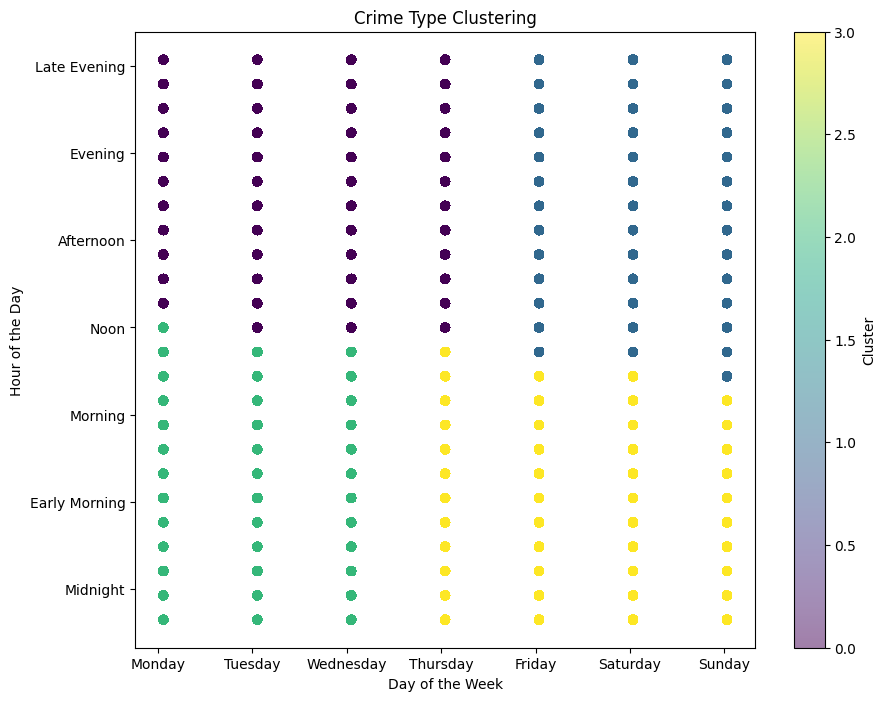

In [58]:
#every day analysis of crimes
#"Theft Crime": "lightgreen",..
# "Assault Crime": "yellow",..
# "Vehicle Crime": "purple",
# "Other": "red"
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Encode the day_of_week column (categorical) using LabelEncoder
le_day_of_week = LabelEncoder()
df_non_duplicates['day_of_week_encoded'] = le_day_of_week.fit_transform(df_non_duplicates['day_of_week'])

# Features for clustering (using encoded values)
X = df_non_duplicates[['day_of_week_encoded', 'hour_of_day']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_non_duplicates['cluster'] = clusters

# Define custom labels for x-axis (days of the week) and y-axis (time of day)
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_labels = ['Midnight', 'Early Morning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Late Evening']

# Create a figure for visualization
plt.figure(figsize=(10, 8))

# Scatter plot with color based on clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Set custom x-axis labels for days of the week
plt.xticks(ticks=np.linspace(-1.5, 1.5, len(x_labels)), labels=x_labels)

# Set custom y-axis labels for time of day
plt.yticks(ticks=np.linspace(-1.5, 1.5, len(y_labels)), labels=y_labels)

# Set titles and labels
plt.title('Crime Type Clustering')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Add colorbar for clusters
plt.colorbar(label='Cluster')

plt.show()


**Question 2:** <br>

Question: How to classify crime types based on temporal and spatial features and how different types of crime based on time and location details? 

Answer:

Algorithm Choice and Problem Statement

For this phase of the project, I applied the Support Vector Machine (SVM) algorithm with an RBF (Radial Basis Function) kernel to classify types of crimes based on features such as the hour of day, latitude, longitude, and month. The goal was to identify if certain types of crimes could be predicted based on spatial and temporal factors.

The SVM algorithm is suitable for this task due to its effectiveness in classification problems with complex decision boundaries. The RBF kernel is particularly powerful in non-linear cases, where the boundaries between classes are not easily separable in a linear way.

Data Preprocessing and Feature Selection

	1.	Feature Selection: I selected hour_of_day, latitude, longitude, and month as the main features for the model. These features were chosen because they are relevant in understanding crime patterns across different times and locations.
	2.	Encoding and Scaling:
	•	The target variable, incident_type, was encoded into numerical labels.
	•	To ensure that each feature had an equal impact on the model, I used Standard Scaling to standardize the features, as SVM is sensitive to the scale of input data. This preprocessing step was essential for the model to work effectively.

Model Training and Evaluation

The dataset was split into training and testing sets (80% training, 20% testing). The SVM model was then trained on the scaled training data, and predictions were made on the test data.

Performance Metrics:

	•	The model’s performance was evaluated using a classification report and a confusion matrix.
	•	The classification report revealed an accuracy of 69%, but further analysis showed that the model performed well primarily for class 3 (likely a majority class), while the performance for other classes was very low, with precision, recall, and F1-scores close to zero for classes 0, 1, 2, and 4.
	•	The confusion matrix illustrated that most predictions fell into the majority class, indicating the model struggled with minority classes.

Analysis of Results and Challenges

	1.	Class Imbalance Issue: A significant class imbalance is evident in the dataset, with class 3 dominating the data. This imbalance caused the model to favor the majority class, resulting in poor precision and recall for the less frequent classes. This imbalance skewed the accuracy metric, making it appear as though the model was performing well overall, while it actually struggled to generalize across different crime types.
	2.	Feature Importance: Since an RBF kernel does not provide direct feature importance, it was challenging to interpret which features were most influential. However, the success in predicting the majority class suggests that certain features, such as hour_of_day and latitude, may be closely associated with that class.

Insights and Potential Improvements

	1.	Alternative Algorithms: Given the poor performance on minority classes, other algorithms like Random Forest and logistic regression could be explored. These ensemble models can often handle imbalanced data more effectively by capturing complex patterns within the minority classes.But after going through those models it can seen that there is the same thing and we can see that the accuracy is low as shown below.

**CITATIONS:**
https://www.geeksforgeeks.org/support-vector-machine-algorithm/ <br>
https://scikit-learn.org/1.5/modules/svm.html




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
le=LabelEncoder()
df_non_duplicates['incident_type_encoded']=le.fit_transform(df_non_duplicates['incident_type_primary'])
# Select features ''for the model
features = ['hour_of_day', 'latitude', 'longitude', 'month']
X = df_non_duplicates[features]
y = df_non_duplicates['incident_type_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))


# Feature importance (for linear SVM)
if svm_model.kernel == 'linear':
    feature_importance = abs(svm_model.coef_[0])
    feature_names = X.columns
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print(feature_importance)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4977
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00       413
           3       0.69      1.00      0.82     16674
           4       0.00      0.00      0.00      1981

    accuracy                           0.69     24125
   macro avg       0.14      0.20      0.16     24125
weighted avg       0.48      0.69      0.56     24125



/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_non_duplicates is your DataFrame

# Check for missing values and handle them if necessary
print(df_non_duplicates.isnull().sum())

# Fill missing values if necessary (example: fill with mode)
df_non_duplicates['day_of_week'].fillna(df_non_duplicates['day_of_week'].mode()[0], inplace=True)

# Encoding categorical variables (incident_type_primary and neighborhood)
le_incident = LabelEncoder()
le_neighborhood = LabelEncoder()
le_day_of_week = LabelEncoder()

df_non_duplicates['incident_type_encoded'] = le_incident.fit_transform(df_non_duplicates['incident_type_primary'])
df_non_duplicates['neighborhood_encoded'] = le_neighborhood.fit_transform(df_non_duplicates['neighborhood'])
df_non_duplicates['day_of_week_encoded'] = le_day_of_week.fit_transform(df_non_duplicates['day_of_week'])

# Selecting relevant features (day_of_week_encoded, hour_of_day, neighborhood_encoded)
features = ['day_of_week_encoded', 'hour_of_day', 'neighborhood_encoded']
X = df_non_duplicates[features]
y = df_non_duplicates['incident_type_encoded']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model ###

# Initialize Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear')

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions using Logistic Regression
logistic_predictions = logistic_model.predict(X_test)

# Evaluate Logistic Regression model performance
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions))
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

### Random Forest Classifier Model ###

# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions using Random Forest Classifier
rf_predictions = random_forest_model.predict(X_test)

# Evaluate Random Forest model performance
print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

case_number              0
incident_datetime        0
incident_type_primary    0
incident_description     0
parent_incident_type     0
                        ..
month                    0
incident_type_encoded    0
neighborhood_encoded     0
day_of_week_encoded      0
cluster                  0
Length: 40, dtype: int64


/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/2926733180.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_non_duplicates['day_of_week'].fillna(df_non_duplicates['day_of_week'].mode()[0], inplace=True)
/var/folders/89/hbkg9qpn41q375z67mzxbytc0000gn/T/ipykernel_23067/2926733180.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Logistic Regression Results:
Accuracy: 0.6911502590673575
Confusion Matrix:
[[    0     0     0  4977     0]
 [    0     0     0    80     0]
 [    0     0     0   413     0]
 [    0     0     0 16674     0]
 [    0     0     0  1981     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4977
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00       413
           3       0.69      1.00      0.82     16674
           4       0.00      0.00      0.00      1981

    accuracy                           0.69     24125
   macro avg       0.14      0.20      0.16     24125
weighted avg       0.48      0.69      0.56     24125



/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Random Forest Classifier Results:
Accuracy: 0.67539896373057
Confusion Matrix:
[[  443     0     1  4519    14]
 [    7     0     0    73     0]
 [   33     0     0   379     1]
 [  763     0     1 15849    61]
 [  126     0     0  1853     2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.09      0.14      4977
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00       413
           3       0.70      0.95      0.81     16674
           4       0.03      0.00      0.00      1981

    accuracy                           0.68     24125
   macro avg       0.21      0.21      0.19     24125
weighted avg       0.55      0.68      0.59     24125



/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanhitha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le